In [169]:
import pandas as pd
import numpy as np

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import statsmodels.formula.api as smf
from statsmodels.regression.rolling import RollingOLS
import talib

np.random.seed(107)

import matplotlib.pyplot as plt

import yfinance as yf
import copy


# Finding cointegrated pairs of stocks for selection

In [18]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n,n))
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1,S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i,j] = score
            pvalue_matrix[i,j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

# Paint Industry Stocks

In [75]:
#symbol_list = ['ATGL.NS', 'GAIL.NS', 'PETRONET.NS', 'IGL.NS','GSPL.NS', 'MGL.NS', 'DEEPENR.NS']
symbol_list = ['ASIANPAINT.NS', 'BERGEPAINT.NS', 'KANSAINER.NS', 'AKZOINDIA.NS', 'SHALPAINTS.NS']

In [76]:
    data = df = yf.Ticker('ATGL.NS').history(period = '2Y', interval = '1d')
    data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-14,168.017379,170.958054,165.924009,168.715164,1181436,0.0,0
2020-01-15,170.459650,177.138476,170.110750,174.347321,3823035,0.0,0
2020-01-16,175.394001,177.836256,172.702536,173.599686,1539425,0.0,0
2020-01-17,171.954899,177.886094,171.107579,174.098099,2357915,0.0,0
2020-01-20,175.344142,176.390827,170.808532,171.506317,983264,0.0,0
...,...,...,...,...,...,...,...
2022-01-10,1790.099976,1809.800049,1750.000000,1763.349976,53429,0.0,0
2022-01-11,1790.000000,1798.650024,1740.250000,1779.949951,178094,0.0,0
2022-01-12,1800.000000,1805.000000,1765.000000,1796.699951,121926,0.0,0


In [77]:
df = pd.DataFrame()
for i in range(len(symbol_list)):
    symbol = symbol_list[i]
    data = yf.Ticker(symbol).history(period = '2Y', interval = '1d')
    data.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis=1,inplace=True)
    data.rename(columns = {'Close':symbol},inplace=True)
    if i == 0:
        df = data
    else:
        df[symbol] = data
df
        
    


,ASIANPAINT.NS,BERGEPAINT.NS,KANSAINER.NS,AKZOINDIA.NS,SHALPAINTS.NS
Date,,,,,
2020-01-14,1796.483276,525.839722,509.413788,1919.098267,84.000000
2020-01-15,1819.295532,539.886597,506.806427,1917.690430,85.250000
2020-01-16,1812.283813,543.460388,511.381561,1950.458618,91.500000
2020-01-17,1807.247559,559.145264,508.577423,1985.557007,89.449997
2020-01-20,1825.714355,563.016846,515.563171,1979.197510,89.750000
...,...,...,...,...,...
2022-01-10,3553.500000,783.950012,595.250000,1985.150024,115.300003
2022-01-11,3538.750000,786.200012,600.650024,1980.000000,115.949997
2022-01-12,3543.800049,788.900024,613.299988,1975.050049,119.750000


In [78]:
df.isna().sum()

ASIANPAINT.NS    0
BERGEPAINT.NS    0
KANSAINER.NS     0
AKZOINDIA.NS     0
SHALPAINTS.NS    0
dtype: int64

In [79]:
df.head(5)

,ASIANPAINT.NS,BERGEPAINT.NS,KANSAINER.NS,AKZOINDIA.NS,SHALPAINTS.NS
Date,,,,,
2020-01-14,1796.483276,525.839722,509.413788,1919.098267,84.000000
2020-01-15,1819.295532,539.886597,506.806427,1917.690430,85.250000
2020-01-16,1812.283813,543.460388,511.381561,1950.458618,91.500000
2020-01-17,1807.247559,559.145264,508.577423,1985.557007,89.449997
2020-01-20,1825.714355,563.016846,515.563171,1979.197510,89.750000


In [80]:
df.iloc[2]

ASIANPAINT.NS    1812.283813
BERGEPAINT.NS     543.460388
KANSAINER.NS      511.381561
AKZOINDIA.NS     1950.458618
SHALPAINTS.NS      91.500000
Name: 2020-01-16 00:00:00, dtype: float64

Heatmap to show the p-values of the cointegration test between each pairof stocks.
Only show the value in the upper-diagonal of the heatmap

[('BERGEPAINT.NS', 'KANSAINER.NS')]


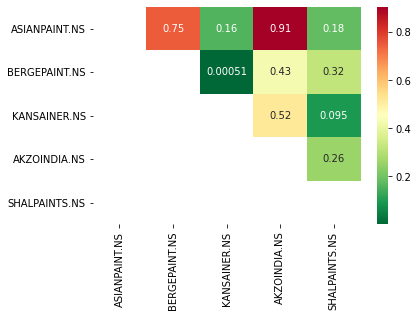

In [81]:
scores, pvalues, pairs = find_cointegrated_pairs(df)

import seaborn as sns
sns.heatmap(pvalues, xticklabels=symbol_list, yticklabels = symbol_list, cmap='RdYlGn_r',annot = True,
                mask = (pvalues >= 0.95))
print(pairs)

Confounding variables are cointegrated but by a third party so they are not cointegrated in reality.
if two stocks are realted to index then each affects the movement of other but in actual there link between them is very weak because they are influenced by may be an index or some other stock

In [84]:
S1 = df['BERGEPAINT.NS']
S2 = df['KANSAINER.NS']

In [87]:
S1

Date
2020-01-14    525.839722
2020-01-15    539.886597
2020-01-16    543.460388
2020-01-17    559.145264
2020-01-20    563.016846
                 ...    
2022-01-10    783.950012
2022-01-11    786.200012
2022-01-12    788.900024
2022-01-13    781.950012
2022-01-14    771.349976
Name: BERGEPAINT.NS, Length: 500, dtype: float64

In [85]:
score, pvalue, _ = coint(S1,S2)
pvalue

0.0005127577163605755

We plot the spread of the two series, Here we use linear regression to calculate a coefficient for their linear combination.

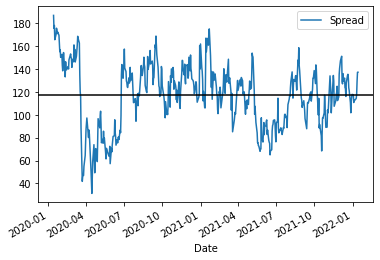

In [88]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2,S1).fit()
S1 = S1['BERGEPAINT.NS']
b = results.params['BERGEPAINT.NS']
# This value b is derived from the data of whole year so like we are using
# the whole data and getting conclusion from itself which is not good
spread = S2 - b*S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])
#if spread is up sell s2,buy s1 / opp for negative spread

In [89]:
b

0.6133898182698143

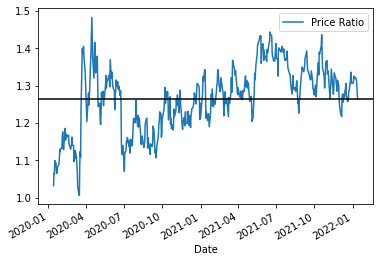

In [90]:
ratio = S1/S2
ratio.plot()
plt.axhline(ratio.mean(), color = 'black')
plt.legend(['Price Ratio'])


In [91]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

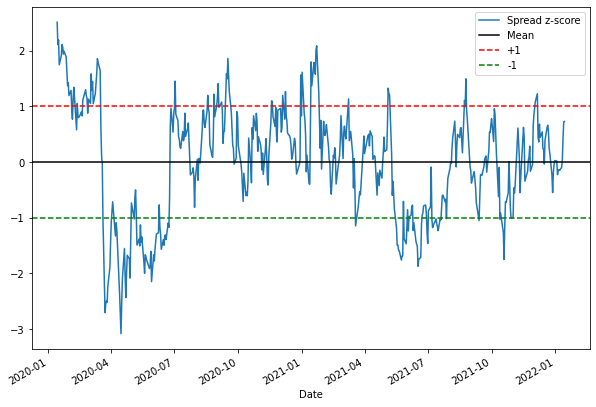

In [92]:
plt.figure(figsize=(10,7))
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color = 'black')
plt.axhline(1.0, color = 'red', linestyle = '--')
plt.axhline(-1.0, color = 'green', linestyle = '--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1'])
#the less the noise more accurate but opportunity cost will increase
#austin olembic process synthetic process, drift, mean to create artifical values

In [120]:
ind_df = df[['BERGEPAINT.NS', 'KANSAINER.NS']]
ind_df.head(2)


,BERGEPAINT.NS,KANSAINER.NS
Date,,
2020-01-14,525.839722,509.413788
2020-01-15,539.886597,506.806427


In [121]:
ind_df['zscore'] = zscore(spread)

<ipython-input-121-842dd6a229e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['zscore'] = zscore(spread)


In [122]:
ind_df

,BERGEPAINT.NS,KANSAINER.NS,zscore
Date,,,
2020-01-14,525.839722,509.413788,2.513092
2020-01-15,539.886597,506.806427,2.109392
2020-01-16,543.460388,511.381561,2.195106
2020-01-17,559.145264,508.577423,1.748189
2020-01-20,563.016846,515.563171,1.914041
...,...,...,...
2022-01-10,783.950012,595.250000,-0.094153
2022-01-11,786.200012,600.650024,0.050438
2022-01-12,788.900024,613.299988,0.445874


In [131]:
ind_df['ratio'] = ind_df['BERGEPAINT.NS']/ ind_df['KANSAINER.NS']

<ipython-input-131-7a58626fdd56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['ratio'] = ind_df['BERGEPAINT.NS']/ ind_df['KANSAINER.NS']


In [132]:
ind_df.dtypes

BERGEPAINT.NS    float64
KANSAINER.NS     float64
zscore           float64
ratio            float64
dtype: object

In [146]:
# INDICATORS
ratio = ind_df['ratio']
ind_df['mavg5'] = ratio.rolling(window=5, center=False).mean()
ind_df['mavg20'] = ratio.rolling(window=20, center = False).mean()
ind_df['std20'] = ratio.rolling(window=20, center=False).std()
ind_df['zscore_20_5'] = (ind_df['mavg5'] - ind_df['mavg20'])/ind_df['std20']

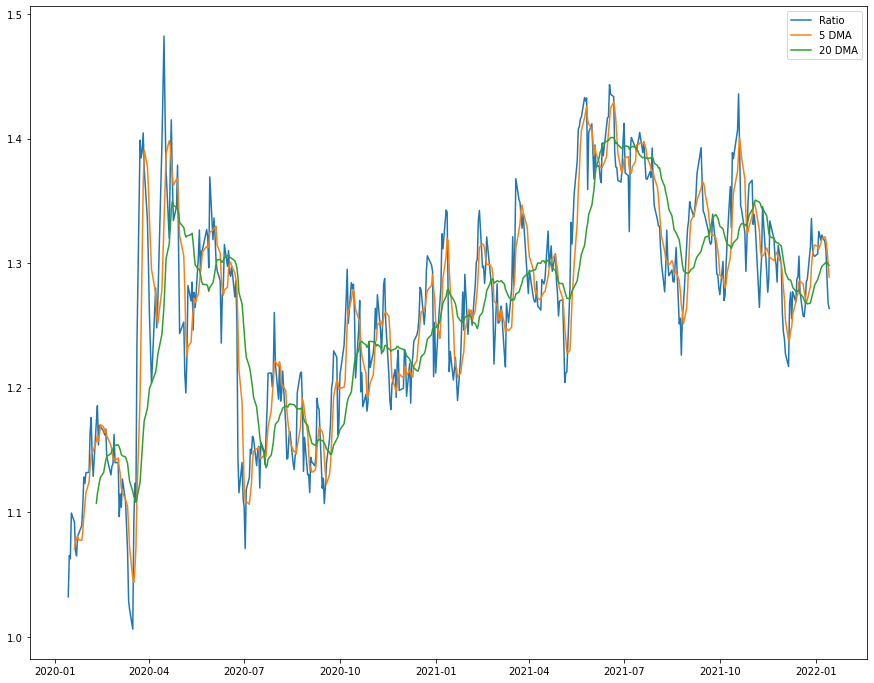

In [147]:
plt.figure(figsize = (15,12))
plt.plot(ind_df.index, ratio.values, label = 'Ratio')
plt.plot(ind_df['mavg5'] , label = '5 DMA')
plt.plot(ind_df['mavg20'], label = '20 DMA')
plt.legend()

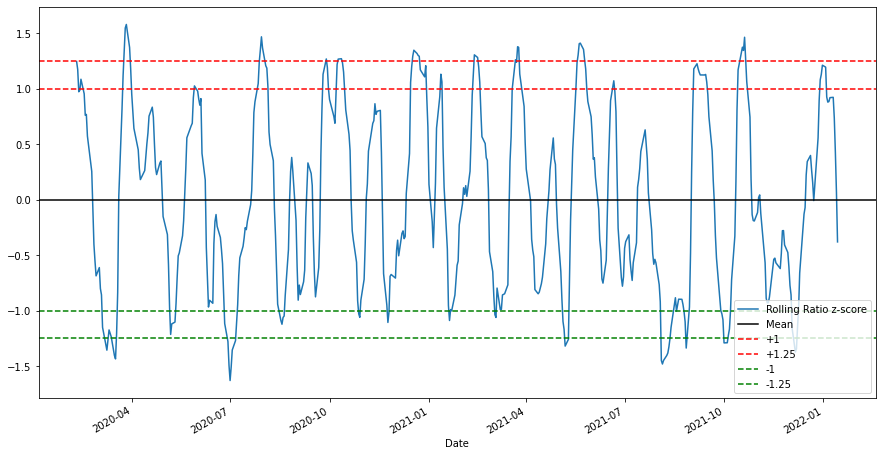

In [150]:
plt.figure(figsize = (15,8))
ind_df['zscore_20_5'].plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])

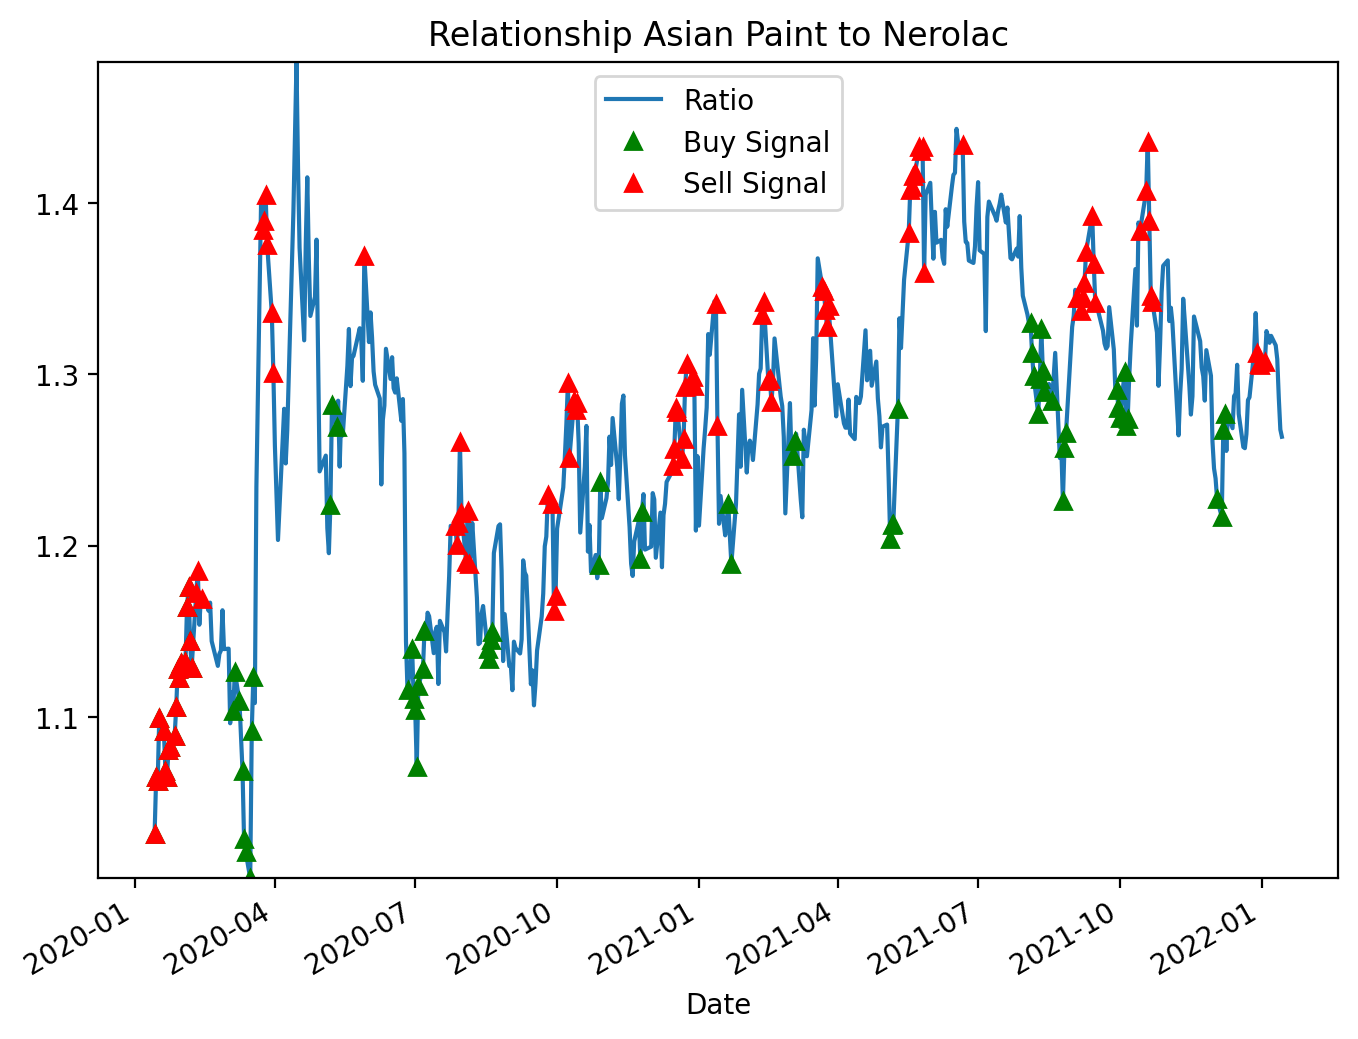

In [153]:
plt.figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ind_df['ratio'].copy()
sell = ind_df['ratio'].copy()
zscore_20_5 = ind_df['zscore_20_5']
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship Asian Paint to Nerolac')
plt.show()

In [159]:
buy

Date
2020-01-14    1.032245
2020-01-15    1.065272
2020-01-16    1.062730
2020-01-17    1.099430
2020-01-20    1.092042
                ...   
2022-01-10    0.000000
2022-01-11    0.000000
2022-01-12    0.000000
2022-01-13    0.000000
2022-01-14    0.000000
Name: ratio, Length: 500, dtype: float64

In [164]:
B = buy.reset_index()
S = sell.reset_index()
trade = pd.merge(B,S, left_index=True, right_index=True)

In [165]:
trade

,Date_x,ratio_x,Date_y,ratio_y
0,2020-01-14,1.032245,2020-01-14,1.032245
1,2020-01-15,1.065272,2020-01-15,1.065272
2,2020-01-16,1.062730,2020-01-16,1.062730
3,2020-01-17,1.099430,2020-01-17,1.099430
4,2020-01-20,1.092042,2020-01-20,1.092042
...,...,...,...,...
495,2022-01-10,0.000000,2022-01-10,0.000000
496,2022-01-11,0.000000,2022-01-11,0.000000
497,2022-01-12,0.000000,2022-01-12,0.000000
498,2022-01-13,0.000000,2022-01-13,0.000000


In [ ]:
buy = 

In [170]:
def symbol_back_test(df):
    all_trades = []

    trade = {'symbol': None, 'Buy/Sell': None, 'entry': None, 'entry_date': None, 'exit': None, 'exit_date': None}

    position = None

    for i in df.index:
        if (df['zscore'][i] < -1):

            if trade['symbol'] is not None:
                trade['exit'] = df['zscore'][i]
                trade['exit_date'] = i
                all_trades.append(copy.deepcopy(trade))

            if position is not None:
                trade['symbol'] = 'test'
                trade['Buy/Sell'] = 'Buy'
                trade['entry'] = df['zscore'][i]
                trade['entry_date'] = i
            position = 'Buy'
                #print('Buy')

        if (df['zscore'][i] > -1):
                
            if trade['symbol'] is not None:
                trade['exit'] = df['zscore'][i]
                trade['exit_date'] = i
                all_trades.append(copy.deepcopy(trade))
                
            if position is not None:
                trade['symbol'] = 'test'
                trade['Buy/Sell'] = 'Sell'
                trade['entry'] = df['zscore'][i]
                trade['entry_date'] = i
            position='Sell'
                #print('Sell')
    #return pd.DataFrame(symbol_trades)
    return all_trades

In [171]:
signal = symbol_back_test(ind_df)

In [176]:
signal = pd.DataFrame(signal)
signal

,symbol,Buy/Sell,entry,entry_date,exit,exit_date
0,test,Sell,2.109392,2020-01-15,2.195106,2020-01-16
1,test,Sell,2.195106,2020-01-16,1.748189,2020-01-17
2,test,Sell,1.748189,2020-01-17,1.914041,2020-01-20
3,test,Sell,1.914041,2020-01-20,2.110605,2020-01-21
4,test,Sell,2.110605,2020-01-21,2.066059,2020-01-22
...,...,...,...,...,...,...
493,test,Sell,-0.148862,2022-01-07,-0.094153,2022-01-10
494,test,Sell,-0.094153,2022-01-10,0.050438,2022-01-11
495,test,Sell,0.050438,2022-01-11,0.445874,2022-01-12
496,test,Sell,0.445874,2022-01-12,0.723305,2022-01-13


In [178]:
if len(signal) > 0:
    signal['PnL'] = np.where(signal['Buy/Sell'] == 'Buy', signal['exit'] - signal['entry'],
                                                signal['entry'] - signal['exit'])
    signal['pnl_percent'] = (signal['PnL'] / signal['entry']) * 100
else:
    print('No Trades')

In [179]:
signal

,symbol,Buy/Sell,entry,entry_date,exit,exit_date,PnL,pnl_percent
0,test,Sell,2.109392,2020-01-15,2.195106,2020-01-16,-0.085714,-4.063457
1,test,Sell,2.195106,2020-01-16,1.748189,2020-01-17,0.446917,20.359697
2,test,Sell,1.748189,2020-01-17,1.914041,2020-01-20,-0.165851,-9.487034
3,test,Sell,1.914041,2020-01-20,2.110605,2020-01-21,-0.196564,-10.269585
4,test,Sell,2.110605,2020-01-21,2.066059,2020-01-22,0.044546,2.110584
...,...,...,...,...,...,...,...,...
493,test,Sell,-0.148862,2022-01-07,-0.094153,2022-01-10,-0.054709,36.751686
494,test,Sell,-0.094153,2022-01-10,0.050438,2022-01-11,-0.144591,153.570808
495,test,Sell,0.050438,2022-01-11,0.445874,2022-01-12,-0.395435,-783.995333
496,test,Sell,0.445874,2022-01-12,0.723305,2022-01-13,-0.277431,-62.221907


In [180]:
signal['PnL'].sum()

14.803849902525318

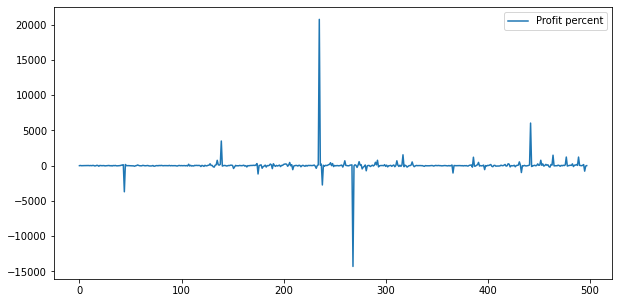

In [184]:
plt.figure(figsize =(10,5))
signal['pnl_percent'].plot()
plt.legend(['Profit percent'])

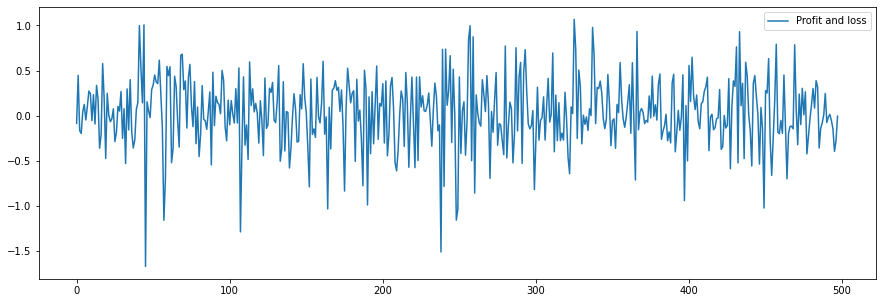

In [187]:
plt.figure(figsize =(15,5))
signal['PnL'].plot()
plt.legend(['Profit and loss'])